In [5]:
from ML import split_data , svm_model , SVM_after_tuning , LogisticRegression_model , LogisticRegression_tuning , lg_model , lg_model_tuning , knn_model , knn_model_tuning

In [6]:
from feature_engineering import perform_feature_engineering

In [7]:
from sklearn.metrics import accuracy_score, classification_report
from cleaning_preprocessing import preprocess_data , clean_data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)
from matplotlib.colors import LinearSegmentedColormap
import warnings
warnings.filterwarnings("ignore")


In [8]:


df= pd.read_csv('churn.csv')
data= df.copy()
data= clean_data(data)
preprocessed_data= preprocess_data(data)
engineered_data= perform_feature_engineering(preprocessed_data)
X_train, X_test, y_train, y_test = split_data(engineered_data)

In [9]:
svm_model(X_train, X_test, y_train, y_test)

Evaluation of SVM Model (Linear Kernel):
Accuracy: 0.8559

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.97      0.86      3377
           1       0.97      0.76      0.85      4022

    accuracy                           0.86      7399
   macro avg       0.87      0.87      0.86      7399
weighted avg       0.88      0.86      0.86      7399



In [10]:
knn_model(X_train, X_test, y_train, y_test)

Evaluation of K-Nearest Neighbors Classifier:
Accuracy: 0.9270

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.90      0.92      3377
           1       0.92      0.95      0.93      4022

    accuracy                           0.93      7399
   macro avg       0.93      0.93      0.93      7399
weighted avg       0.93      0.93      0.93      7399



array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [12]:
lg_model(X_train, X_test, y_train, y_test)

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[160]	valid_0's binary_logloss: 0.15436
 Evaluation of LightGBM Model (with Early Stopping using callbacks):
Accuracy: 0.9374

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      3377
           1       0.95      0.93      0.94      4022

    accuracy                           0.94      7399
   macro avg       0.94      0.94      0.94      7399
weighted avg       0.94      0.94      0.94      7399



In [13]:
LogisticRegression_model(X_train, X_test, y_train, y_test)

Evaluation of Logistic Regression Model:
Accuracy: 0.8546

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.95      0.86      3377
           1       0.95      0.77      0.85      4022

    accuracy                           0.85      7399
   macro avg       0.86      0.86      0.85      7399
weighted avg       0.87      0.85      0.85      7399



# Tunning

In [14]:
y_pred_svm=SVM_after_tuning(X_train, X_test, y_train, y_test)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
 Best Parameters: {'svc__C': 9.799098521619943, 'svc__degree': 3, 'svc__gamma': 'auto', 'svc__kernel': 'rbf'}
 Best CV Score: 0.9247

 Evaluation on Test Set:
Accuracy: 0.9242

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      3377
           1       0.95      0.91      0.93      4022

    accuracy                           0.92      7399
   macro avg       0.92      0.93      0.92      7399
weighted avg       0.93      0.92      0.92      7399



In [15]:
y_pred_lr=LogisticRegression_tuning(X_train, X_test, y_train, y_test)

 Evaluation of Tuned Logistic Regression Model (Bayesian Optimization):
Accuracy: 0.8546

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.95      0.86      3377
           1       0.95      0.77      0.85      4022

    accuracy                           0.85      7399
   macro avg       0.86      0.86      0.85      7399
weighted avg       0.87      0.85      0.85      7399

 Best Parameters found by Bayesian Optimization:
OrderedDict([('C', 411), ('max_iter', 755), ('penalty', 'l2')])


In [16]:
y_pred_lg=lg_model_tuning(X_train, X_test, y_train, y_test)

Best Parameters:
   learning_rate: 0.06978999788110851
   max_depth: 20
   min_child_samples: 17
   n_estimators: 200
   num_leaves: 81
   subsample: 0.7975990992289792

 Best Recall (Cross-Validation): 0.9430

 Test Accuracy: 0.9324

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.93      3377
           1       0.93      0.94      0.94      4022

    accuracy                           0.93      7399
   macro avg       0.93      0.93      0.93      7399
weighted avg       0.93      0.93      0.93      7399



In [21]:
y_pred_knn=knn_model_tuning(X_train, X_test, y_train, y_test)

Evaluation of K-Nearest Neighbors Classifier:
Accuracy: 0.9270

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.90      0.92      3377
           1       0.92      0.95      0.93      4022

    accuracy                           0.93      7399
   macro avg       0.93      0.93      0.93      7399
weighted avg       0.93      0.93      0.93      7399

 Best Parameters: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
Best CV Score: 0.9401500938086305
Accuracy on Test Set: 0.9270171644816867

 Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.90      0.92      3377
           1       0.92      0.95      0.93      4022

    accuracy                           0.93      7399
   macro avg       0.93      0.93      0.93      7399
weighted avg       0.93      0.93      0.93      7399



In [25]:

# Create a Set2-inspired colormap for the confusion matrix
set2_colors = sns.color_palette("Set2", 4)
custom_cmap = LinearSegmentedColormap.from_list("custom_set2", [set2_colors[3], set2_colors[2]])

# Function to plot confusion matrix with Set2-like color
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap=custom_cmap,
                xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Plotting confusion matrices
plot_confusion_matrix(y_test, y_pred_lr, 'Logistic_Regression')
plot_confusion_matrix(y_test, y_pred_knn, 'KNN')
plot_confusion_matrix(y_test, y_pred_svm, 'SVM')
plot_confusion_matrix(y_test, y_pred_lg, 'LightGBM')

# Computing metrics
models = ['Logistic_Regression', 'KNN', 'SVM', 'LightGBM']

accuracy = [
    accuracy_score(y_test, y_pred_lr),
    accuracy_score(y_test, y_pred_knn),
    accuracy_score(y_test, y_pred_svm),
    accuracy_score(y_test, y_pred_lg)
]

precision = [
    precision_score(y_test, y_pred_lr),
    precision_score(y_test, y_pred_knn),
    precision_score(y_test, y_pred_svm),
    precision_score(y_test, y_pred_lg)
]

recall = [
    recall_score(y_test, y_pred_lr),
    recall_score(y_test, y_pred_knn),
    recall_score(y_test, y_pred_svm),
    recall_score(y_test, y_pred_lg)
]

f1_score_values = [
    f1_score(y_test, y_pred_lr),
    f1_score(y_test, y_pred_knn),
    f1_score(y_test, y_pred_svm),
    f1_score(y_test, y_pred_lg)
]


InvalidParameterError: The 'y_pred' parameter of confusion_matrix must be an array-like. Got None instead.

                 Model  Accuracy  Precision    Recall  F1-Score
3             LightGBM  0.930261   0.929026  0.943809  0.936359
1                  KNN  0.928234   0.928975  0.939831  0.934372
2                  SVM  0.924179   0.951474  0.906763  0.928581
0  Logistic_Regression  0.854575   0.949085  0.773993  0.852643

Best model with the highest recall: LightGBM with Recall: 0.9438090502237693


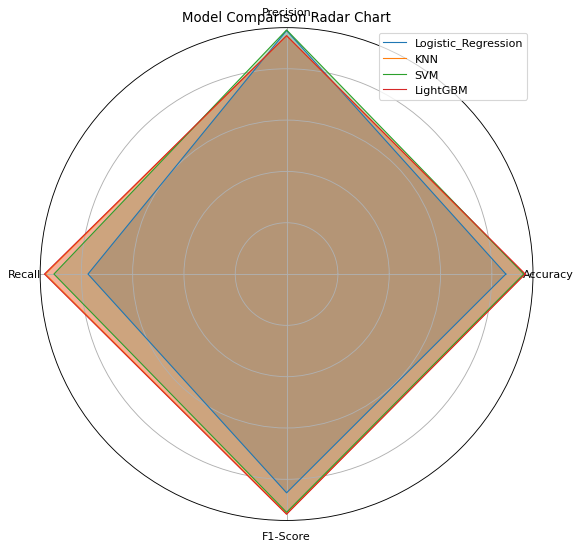

In [34]:

# Create a DataFrame with the metrics
comparison_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1_score_values
})

# Sort the comparison DataFrame by Recall in descending order
sorted_comparison_df = comparison_df.sort_values(by='Recall', ascending=False)

# Output the sorted comparison table
print(sorted_comparison_df)

# Identify the model with the highest recall
best_model = sorted_comparison_df.iloc[0]
print(f"\nBest model with the highest recall: {best_model['Model']} with Recall: {best_model['Recall']}")

# Radar Plot for Comparison of Models
categories = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
num_vars = len(categories)

# Create a list of the data to be plotted
values = [
    accuracy,
    precision,
    recall,
    f1_score_values
]

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(8, 8), dpi=80, subplot_kw=dict(polar=True))

# Compute angle for each category
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Add the first value to the end to close the radar chart
angles += angles[:1]

# Plot the radar chart for each model
for i in range(len(models)):
    values_for_plot = [
        accuracy[i],
        precision[i],
        recall[i],
        f1_score_values[i]
    ]
    values_for_plot += values_for_plot[:1]  # Ensure the plot is closed
    ax.plot(angles, values_for_plot, linewidth=1, linestyle='solid', label=models[i])
    ax.fill(angles, values_for_plot, alpha=0.25)

# Set the labels of each axis
ax.set_yticklabels([])  # Hide the radial ticks
ax.set_xticks(angles[:-1])  # Remove the last tick to avoid overlap
ax.set_xticklabels(categories)

# Add a title
ax.set_title('Model Comparison Radar Chart')

# Show the plot
plt.legend(loc='best')
plt.show()


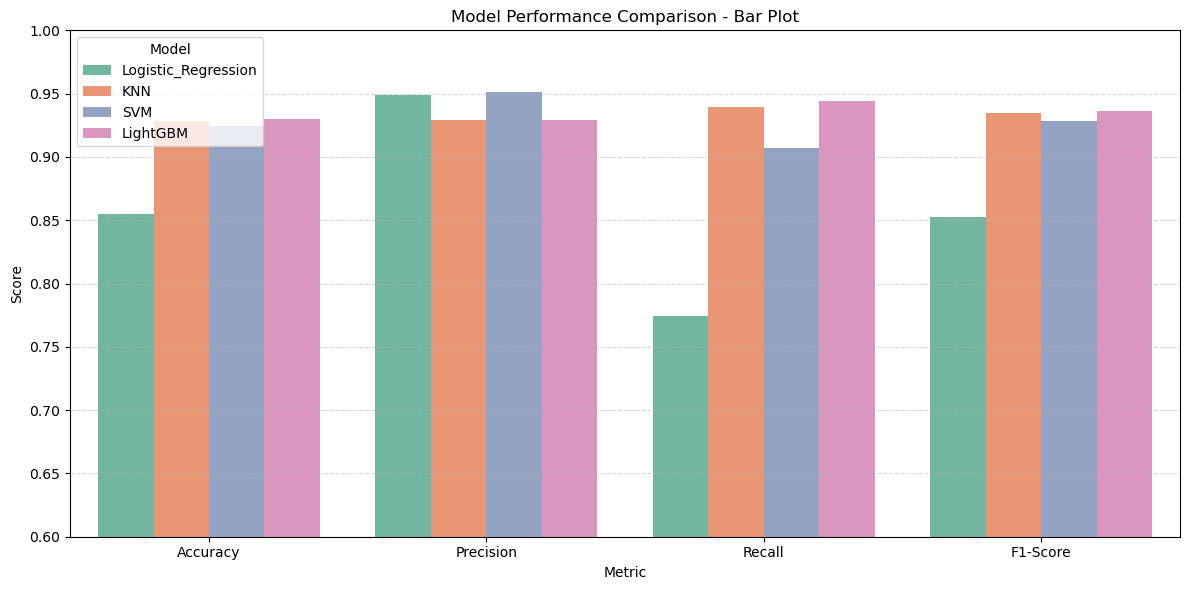

In [35]:
comparison_melted = comparison_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(12, 6))
sns.barplot(data=comparison_melted, x='Metric', y='Score', hue='Model', palette='Set2')

plt.title('Model Performance Comparison - Bar Plot')
plt.ylim(0.6, 1.0)
plt.ylabel('Score')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title='Model')
plt.tight_layout()

plt.show()